In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding, TimeDistributed
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
word = 'machine'
chars = sorted(set(word))  # unique characters from word
char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for ch, i in char2idx.items()}
vocab_size = len(chars)

In [5]:
def generate_data_from_word(word, num_samples=5000):
    X, Y = [], []
    for _ in range(num_samples):
        start = 0  # always use the same word
        inp_seq = word[start:len(word)-1]      # 'machin'
        tgt_seq = word[start+1:len(word)]      # 'achine'
        X.append([char2idx[ch] for ch in inp_seq])
        Y.append([char2idx[ch] for ch in tgt_seq])
    return np.array(X), np.array(Y)

X, Y = generate_data_from_word(word)
Y_onehot = to_categorical(Y, num_classes=vocab_size)

In [6]:
def build_and_train(model_type='RNN', epochs=50):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=16, input_length=X.shape[1]))

    if model_type == 'RNN':
        model.add(SimpleRNN(32, return_sequences=True))
    elif model_type == 'LSTM':
        model.add(LSTM(32, return_sequences=True))
    elif model_type == 'GRU':
        model.add(GRU(32, return_sequences=True))

    model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X, Y_onehot, epochs=epochs, batch_size=64, validation_split=0.2, verbose=0)
    return model, history

In [7]:
histories = {}
models = {}
for m_type in ['RNN', 'LSTM', 'GRU']:
    print(f"Training {m_type}...")
    model, history = build_and_train(m_type)
    histories[m_type] = history
    models[m_type] = model


Training RNN...
Training LSTM...
Training GRU...


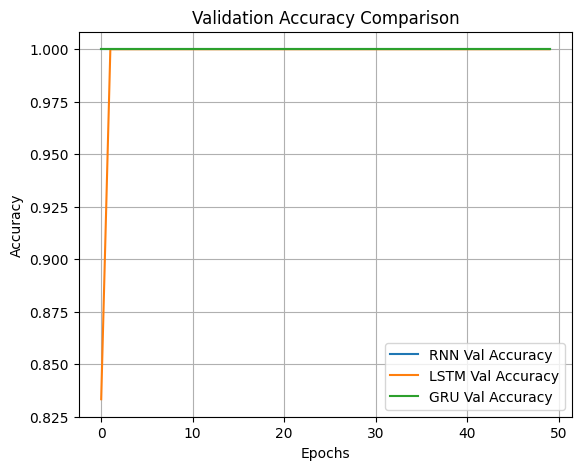

In [8]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for m_type in histories:
    plt.plot(histories[m_type].history['val_accuracy'], label=f'{m_type} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

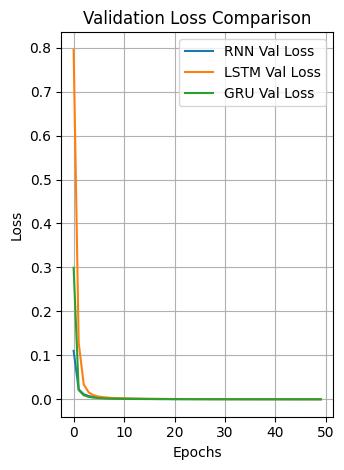

In [10]:
plt.subplot(1, 2, 2)
for m_type in histories:
    plt.plot(histories[m_type].history['val_loss'], label=f'{m_type} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
print("\n Final Evaluation (in %):")
for m_type, model in models.items():
    loss, acc = model.evaluate(X, Y_onehot, verbose=0)
    print(f"{m_type}: Accuracy = {acc * 100:.2f}%, Loss = {loss * 100:.2f}%")



 Final Evaluation (in %):
RNN: Accuracy = 100.00%, Loss = 0.01%
LSTM: Accuracy = 100.00%, Loss = 0.01%
GRU: Accuracy = 100.00%, Loss = 0.01%
